<a href="https://colab.research.google.com/github/sabatabassum777/AIML_BOOTCAMP/blob/main/DAY5(dataset2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
dataset='/content/EmissionsData.csv'
import pandas as pd
df=pd.read_csv(dataset)

In [2]:
df.head(10)

,SNO,ENGINESIZE,CO2EMISSIONS
0,0,2.0,196.0
1,1,2.4,221.0
2,2,1.5,136.0
3,3,3.5,255.0
4,4,3.5,244.0
5,5,3.5,230.0
6,6,3.5,232.0
7,7,3.7,232.0
8,8,3.7,255.0
9,9,2.4,267.0


In [3]:
df.shape

(14, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SNO           14 non-null     int64  
 1   ENGINESIZE    13 non-null     float64
 2   CO2EMISSIONS  12 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 464.0 bytes


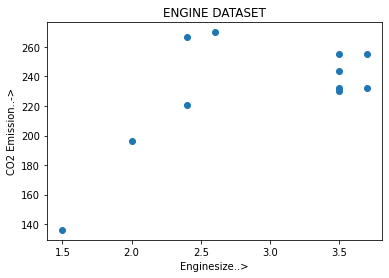

In [5]:
#step2 Visualization
import matplotlib.pyplot as plt
plt.scatter(df.ENGINESIZE,df.CO2EMISSIONS)
plt.xlabel("Enginesize..>")
plt.ylabel("CO2 Emission..->")
plt.title("ENGINE DATASET")
plt.show()

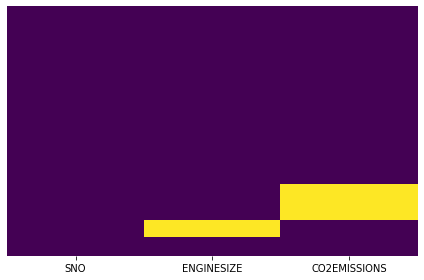

In [6]:
#impurities
import seaborn as sns
def heatmap(df):
  plt.figure(figsize=(6,4))
  sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis",cbar=False)
  plt.tight_layout()
  return plt.show()
heatmap(df)

In [7]:
#step 3 
#preprocessing the dataset
df=df.dropna()
df.head()

,SNO,ENGINESIZE,CO2EMISSIONS
0,0,2.0,196.0
1,1,2.4,221.0
2,2,1.5,136.0
3,3,3.5,255.0
4,4,3.5,244.0


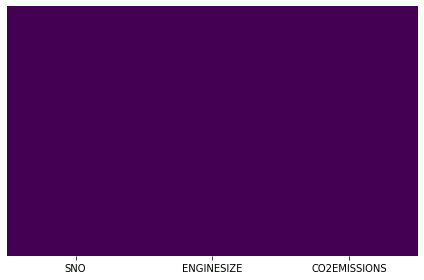

In [8]:
import seaborn as sns
def heatmap(df):
  plt.figure(figsize=(6,4))
  sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis",cbar=False)
  plt.tight_layout()
  return plt.show()
heatmap(df)

In [12]:
#step4  preparing the data
x=df.iloc[0:,-2:-1].values
y=df.iloc[:,-1:].values

In [13]:
x

array([[2. ],
       [2.4],
       [1.5],
       [3.5],
       [3.5],
       [3.5],
       [3.5],
       [3.7],
       [3.7],
       [2.4],
       [2.6]])

In [14]:
y

array([[196.],
       [221.],
       [136.],
       [255.],
       [244.],
       [230.],
       [232.],
       [232.],
       [255.],
       [267.],
       [270.]])

In [15]:
import numpy as np
x=np.array(df[['ENGINESIZE']])
y=np.array(df[['CO2EMISSIONS']])
x

array([[2. ],
       [2.4],
       [1.5],
       [3.5],
       [3.5],
       [3.5],
       [3.5],
       [3.7],
       [3.7],
       [2.4],
       [2.6]])

In [16]:
y

array([[196.],
       [221.],
       [136.],
       [255.],
       [244.],
       [230.],
       [232.],
       [232.],
       [255.],
       [267.],
       [270.]])

In [18]:
#splitting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [19]:
x_train

array([[2.6],
       [3.5],
       [2.4],
       [3.7],
       [3.7],
       [3.5],
       [2. ],
       [3.5]])

In [20]:
y_train

array([[270.],
       [232.],
       [221.],
       [232.],
       [255.],
       [255.],
       [196.],
       [230.]])

In [21]:
x_test

array([[3.5],
       [2.4],
       [1.5]])

In [22]:
y_test

array([[244.],
       [267.],
       [136.]])

In [25]:
#training
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [26]:
model.fit(x_train,y_train)

LinearRegression()

In [27]:
#prediction
y_pred=model.predict(x_test)
y_pred

array([[242.53592696],
       [225.04684399],
       [210.73759428]])

In [28]:
y_test

array([[244.],
       [267.],
       [136.]])

In [29]:
print("predicted value for training data:",model.score(x_train,y_train))

predicted value for training data: 0.21113485584757263


In [30]:
print("predicted value for testing data:",model.score(x_test,y_test))

predicted value for testing data: 0.24903739094667476


In [31]:
accuracy=model.score(x,y)*100
print(accuracy)

28.766650939623016


In [32]:
model.coef_

array([[15.89916634]])

In [33]:
model.intercept_

array([186.88884478])

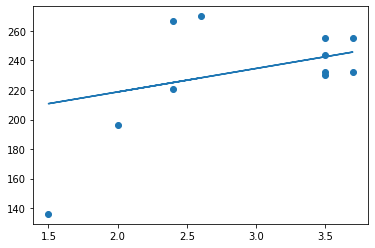

In [34]:
#plot linear regression
line=model.coef_*x+model.intercept_
plt.scatter(x,y)
plt.plot(x,line)
plt.show()

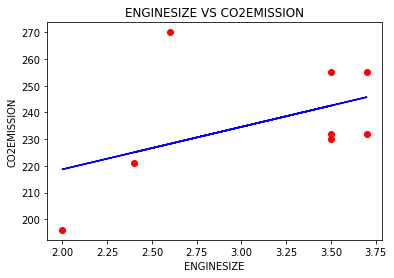

In [35]:
#Result for train
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,model.predict(x_train),color='blue')
plt.title('ENGINESIZE VS CO2EMISSION')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSION')
plt.show()

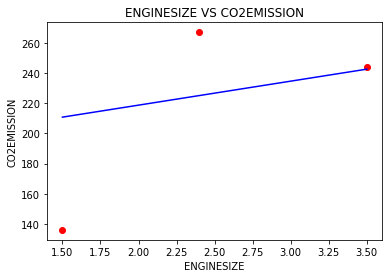

In [37]:
#result for test
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,model.predict(x_test),color='blue')
plt.title('ENGINESIZE VS CO2EMISSION')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSION')
plt.show()